## Importing Modules

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import pickle

## Loading dataset

In [2]:
df = pd.read_excel(r'/Users/mac/Desktop/Surrey data.xlsx')

## Data Inspection

In [3]:
df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,6e5ee549df4000cde324f8892f096986202eead0b62150...,2022-01,Surrey Police,Surrey Police,0.126013,51.560276,On or near Manor Square,E01000098,Barking and Dagenham 023D,1,0.0,NaN
1,c542db37c93c97ea06b31c377b367b2518dd301ba6e376...,2022-01,Surrey Police,Surrey Police,-1.449245,53.585310,On or near Spring Lane,E01007437,Barnsley 002C,1,0.0,NaN
2,4af41a034be41b25964c535cafe46dec80992c28cb5b24...,2022-01,Surrey Police,Surrey Police,-0.736215,51.395929,On or near Parking Area,E01016203,Bracknell Forest 008D,2,0.0,NaN
3,8ad5de2abde1b5371762f84ba9f50aca55de5686e05b72...,2022-01,Surrey Police,Surrey Police,-0.776613,51.398399,On or near Eddington Road,E01016213,Bracknell Forest 009D,1,0.0,NaN
4,2eff27cb0fd49752dff9de218434d0b25a82a487b3ac01...,2022-01,Surrey Police,Surrey Police,-0.778241,51.357754,On or near Copperfield Avenue,E01016235,Bracknell Forest 013C,1,0.0,NaN


In [4]:
print('Missing values')
print(df.isnull().sum())
print("---------------------------------")
print("missing values in percentage")
print(round(df.isnull().sum()/df.shape[0]*100), 2)

Missing values
Crime ID                  45039
Month                         0
Reported by                   0
Falls within                  0
Longitude                  5520
Latitude                   5520
Location                      0
LSOA code                  5520
LSOA name                  5520
Crime type                    0
Last outcome category     45039
Context                  263327
dtype: int64
---------------------------------
missing values in percentage
Crime ID                  17.0
Month                      0.0
Reported by                0.0
Falls within               0.0
Longitude                  2.0
Latitude                   2.0
Location                   0.0
LSOA code                  2.0
LSOA name                  2.0
Crime type                 0.0
Last outcome category     17.0
Context                  100.0
dtype: float64 2


In [5]:
df.duplicated().sum()

9866

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263327 entries, 0 to 263326
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Crime ID               218288 non-null  object 
 1   Month                  263327 non-null  object 
 2   Reported by            263327 non-null  object 
 3   Falls within           263327 non-null  object 
 4   Longitude              257807 non-null  float64
 5   Latitude               257807 non-null  float64
 6   Location               263327 non-null  object 
 7   LSOA code              257807 non-null  object 
 8   LSOA name              257807 non-null  object 
 9   Crime type             263327 non-null  int64  
 10  Last outcome category  218288 non-null  float64
 11  Context                0 non-null       float64
dtypes: float64(4), int64(1), object(7)
memory usage: 24.1+ MB


In [88]:
df.nunique()

Crime ID                 218288
Month                        36
Reported by                   1
Falls within                  1
Longitude                 24708
Latitude                  23951
Location                  11321
LSOA code                  1247
LSOA name                  1247
Crime type                   14
Last outcome category        13
Context                       0
dtype: int64

## Data Cleaning

In [7]:
df = df.drop(columns = ['Context', 'Reported by', 'Falls within', 'Crime ID', 'LSOA code', 'LSOA name'])

In [8]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m').dt.month

In [10]:
df = df.dropna()

In [11]:
df.head()

,Month,Longitude,Latitude,Location,Crime type,Last outcome category
0,1,0.126013,51.560276,On or near Manor Square,1,0.0
1,1,-1.449245,53.585310,On or near Spring Lane,1,0.0
2,1,-0.736215,51.395929,On or near Parking Area,2,0.0
3,1,-0.776613,51.398399,On or near Eddington Road,1,0.0
4,1,-0.778241,51.357754,On or near Copperfield Avenue,1,0.0


In [12]:
df = df.drop_duplicates()

In [13]:
df.select_dtypes(include = 'object').nunique()

Location    11132
dtype: int64

## Data Visualization

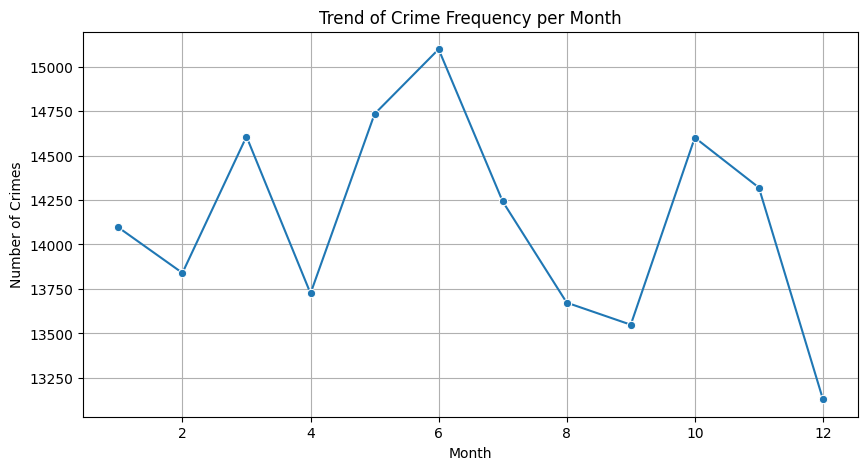

In [92]:
# Aggregate crime counts per month
monthly_counts = df.groupby('Month').size().reset_index(name='Crime Count')
    
# Plot line chart
fig_trend, ax_trend = plt.subplots(figsize=(10, 5))
sns.lineplot(data=monthly_counts, x='Month', y='Crime Count', marker='o', ax=ax_trend)
ax_trend.set_xlabel("Month")
ax_trend.set_ylabel("Number of Crimes")
ax_trend.set_title("Trend of Crime Frequency per Month")
ax_trend.grid(True)


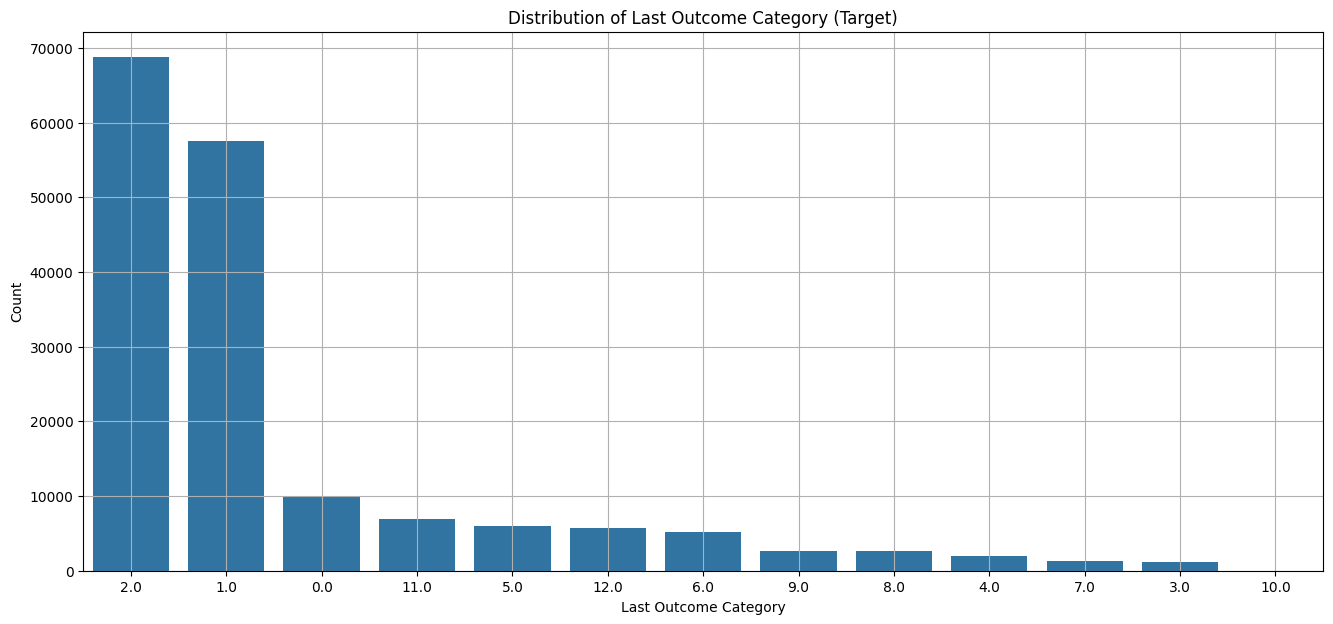

Last outcome category
2.0     68733
1.0     57539
0.0      9883
11.0     6984
5.0      6013
12.0     5702
6.0      5121
9.0      2662
8.0      2605
4.0      1938
7.0      1258
3.0      1151
10.0       26
Name: count, dtype: int64


In [90]:
# Distribution of Last outcome category
plt.figure(figsize=(16,7))
sns.countplot(x='Last outcome category', data=df, order = df['Last outcome category'].value_counts().index)
plt.title('Distribution of Last Outcome Category (Target)')
plt.xlabel('Last Outcome Category')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Print value counts for reference
print(df['Last outcome category'].value_counts())


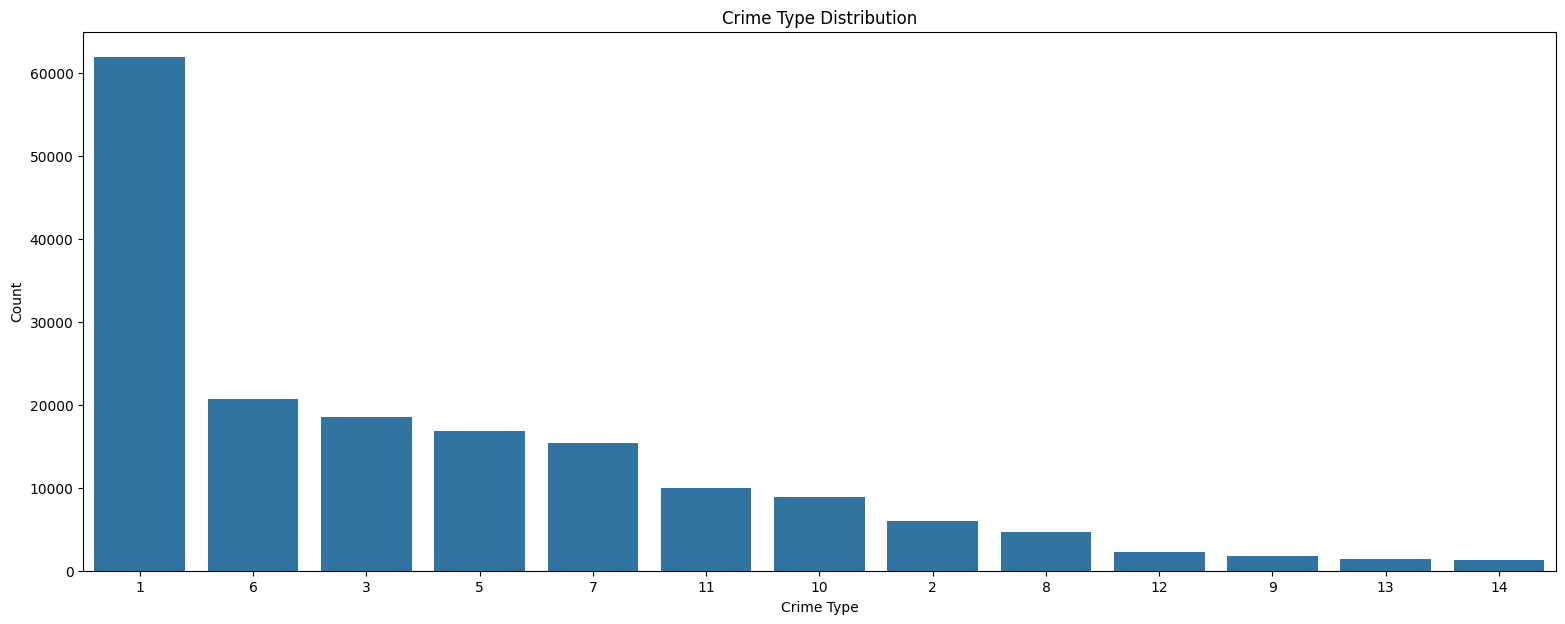

In [64]:
# Count of Crime types
plt.figure(figsize=(19,7))
sns.countplot(x='Crime type', data=df, order = df['Crime type'].value_counts().index)
plt.title('Crime Type Distribution')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.show()


<Axes: xlabel='count', ylabel='Location'>

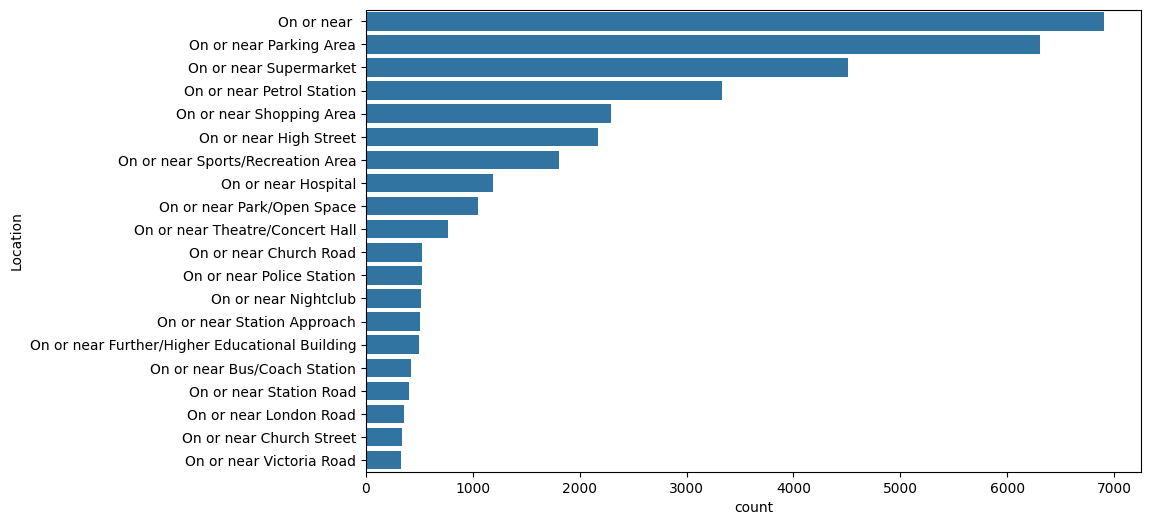

In [66]:
top_locations = df['Location'].value_counts().nlargest(20).index
df_top_loc = df[df['Location'].isin(top_locations)]

fig2, ax2 = plt.subplots(figsize=(10,6))
sns.countplot(data=df_top_loc, y='Location', order=top_locations, ax=ax2)

## Preprocessing for ML

In [69]:
# Encoding categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = df[col].astype(str)  
    df[col + '_Encoded'] = le.fit_transform(df[col])
    le_dict[col] = le  # to save encoders for later use in streamlit app



In [72]:
df.head(2)

,Month,Longitude,Latitude,Location,Crime type,Last outcome category,Location_Encoded
0,1,0.126013,51.560276,On or near Manor Square,1,0.0,6225
1,1,-1.449245,53.585310,On or near Spring Lane,1,0.0,8955


In [81]:
features = ['Location_Encoded', 'Month', 'Longitude', 'Latitude', 'Crime type', 'Last outcome category']

In [82]:
X = df[features].values

In [84]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Fitting Unsupervised ML using KMeans

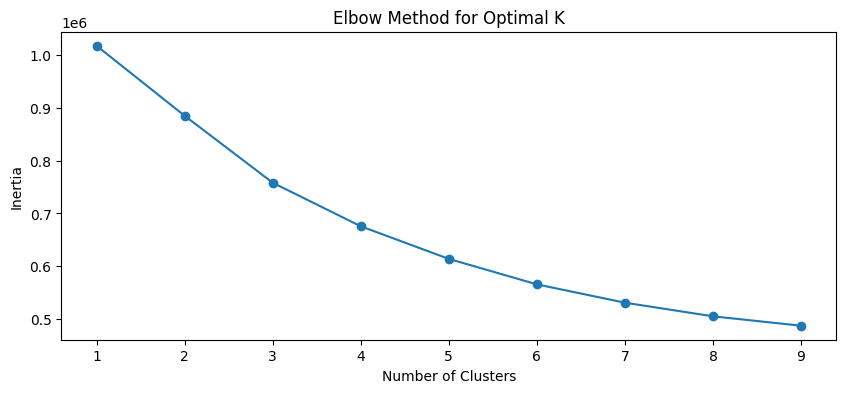

In [76]:
#Finding the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 10)
 
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
# Plot the Elbow Curve
plt.figure(figsize=(10,4))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [85]:
# KMeans Clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print("Cluster counts:\n", df['Cluster'].value_counts())

Cluster counts:
 Cluster
1    76790
0    72001
2    20824
Name: count, dtype: int64


In [78]:
df

,Month,Longitude,Latitude,Location,Crime type,Last outcome category,Location_Encoded,Cluster
0,1,0.126013,51.560276,On or near Manor Square,1,0.0,6225,0
1,1,-1.449245,53.585310,On or near Spring Lane,1,0.0,8955,1
2,1,-0.736215,51.395929,On or near Parking Area,2,0.0,7418,1
3,1,-0.776613,51.398399,On or near Eddington Road,1,0.0,3192,0
4,1,-0.778241,51.357754,On or near Copperfield Avenue,1,0.0,2387,2
...,...,...,...,...,...,...,...,...
263181,12,-0.575237,51.295932,On or near B380,9,1.0,550,2
263182,12,-0.575934,51.296102,On or near Mayford Green,9,11.0,6374,0
263184,12,-0.575237,51.295932,On or near B380,1,11.0,550,2
263185,12,-0.575934,51.296102,On or near Mayford Green,1,11.0,6374,0


## Saving the data, model and scaler for use in the streamlit app

In [86]:
import pickle
# Save cleaned data to CSV
df.to_csv('cleaned_data.csv', index=False)

# Save the KMeans model
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

# Save the StandardScaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [87]:
df

,Month,Longitude,Latitude,Location,Crime type,Last outcome category,Location_Encoded,Cluster
0,1,0.126013,51.560276,On or near Manor Square,1,0.0,6225,1
1,1,-1.449245,53.585310,On or near Spring Lane,1,0.0,8955,0
2,1,-0.736215,51.395929,On or near Parking Area,2,0.0,7418,1
3,1,-0.776613,51.398399,On or near Eddington Road,1,0.0,3192,1
4,1,-0.778241,51.357754,On or near Copperfield Avenue,1,0.0,2387,1
...,...,...,...,...,...,...,...,...
263181,12,-0.575237,51.295932,On or near B380,9,1.0,550,0
263182,12,-0.575934,51.296102,On or near Mayford Green,9,11.0,6374,2
263184,12,-0.575237,51.295932,On or near B380,1,11.0,550,2
263185,12,-0.575934,51.296102,On or near Mayford Green,1,11.0,6374,2
